In [4]:
import numpy as np

d = 64                           # dimension
nb = 100000                      # database size
nq = 10000                       # nb of queries
np.random.seed(1234)             # make reproducible
xb = np.random.random((nb, d)).astype('float32')
xb[:, 0] += np.arange(nb) / 1000.
xq = np.random.random((nq, d)).astype('float32')
xq[:, 0] += np.arange(nq) / 1000.

import faiss                   # make faiss available
index = faiss.IndexFlatL2(d)   # build the index
print(index.is_trained)
index.add(xb)                  # add vectors to the index
print(index.ntotal)

k = 4                          # we want to see 4 nearest neighbors
D, I = index.search(xb[:5], k) # sanity check
print(I)
print(D)
D, I = index.search(xq, k)     # actual search
print(I[:5])                   # neighbors of the 5 first queries
print(I[-5:])                  # neighbors of the 5 last queries

True
100000
[[  0 393 363  78]
 [  1 555 277 364]
 [  2 304 101  13]
 [  3 173  18 182]
 [  4 288 370 531]]
[[0.        7.1751738 7.20763   7.2511625]
 [0.        6.3235645 6.684581  6.799946 ]
 [0.        5.7964087 6.391736  7.2815123]
 [0.        7.2779055 7.5279875 7.662846 ]
 [0.        6.7638035 7.2951202 7.3688145]]


KeyboardInterrupt: 

tensor([821])
tensor([885])
tensor([130])


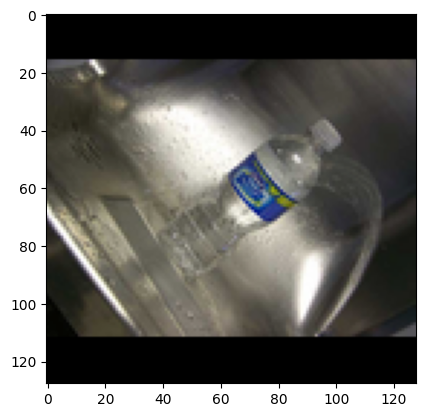

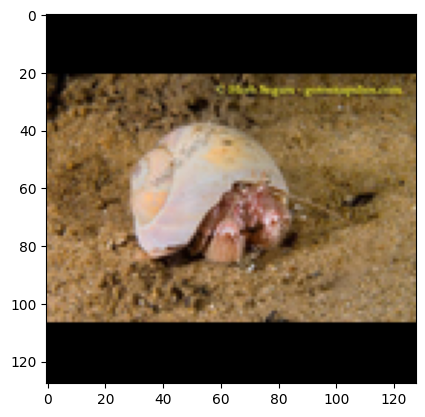

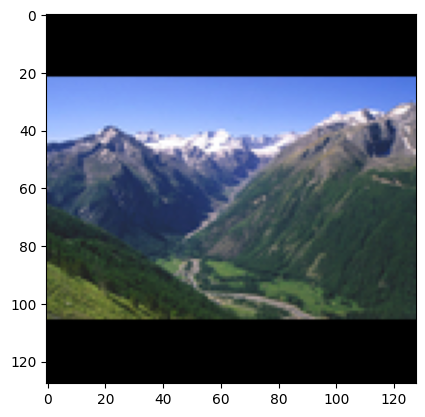

In [1]:
from decouple import Config, RepositoryEnv
import sys
sys.path.insert(0, "..")
from dataset import ImagenetDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

config = Config(RepositoryEnv("../../.env"))
dataloader = DataLoader(ImagenetDataset(), batch_size=1, shuffle=True)
cnt = 0
for img, label in dataloader:
    img = img.squeeze(0)
    fig = plt.figure()
    plt.imshow(img)
    cnt += 1
    print(label)
    if cnt > 2:
        break

In [11]:
import pandas as pd
import numpy as np

path = "/gscratch/cse/lee0618/fitzpatrick17k/fitzpatrick17k.csv"
df = pd.read_csv(path)
# number of rows
print(f"num of rows: {len(df)}")
print(f"unique skin tone label = {df['fitzpatrick_scale'].unique()}")
print(f"num of missing skin tone label = {len(df.loc[df['fitzpatrick_scale'] == -1])}")

num of rows: 16577
unique skin tone label = [ 3  1  2  6  4 -1  5]
num of missing skin tone label = 565
